In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
features=pd.read_csv('../../data/flanking_umap.csv',index_col=0)

In [42]:
features=pd.concat((
    features
    .label_name
    .drop_duplicates()
    .apply(lambda label: features.query('label_name==@label').sample(10000))
).tolist(),axis=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


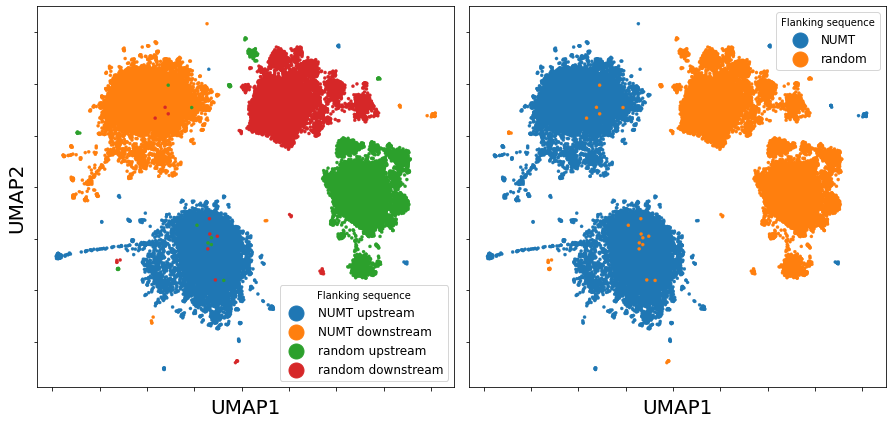

In [43]:

features['2label_name']=features['label_name'].apply(lambda name: name.rsplit()[0])

fig,axs=plt.subplots(1,2,figsize=(12.5,6.),sharey=True)

kwargs={'edgecolor':'face'}
scplot1=sns.scatterplot(x='x',y='y',hue='label_name',data=features,s=10,ax=axs[0],palette='tab10',**kwargs)
axs[0].set(xticklabels=[],yticklabels=[])
axs[0].set_xlabel('UMAP1',fontsize=20)
axs[0].set_ylabel('UMAP2',fontsize=20)
scplot1.legend(title='Flanking sequence',prop={'size': 12},markerscale=2.5,fontsize='20')

scplot2=sns.scatterplot(x='x',y='y',hue='2label_name',data=features,s=10,ax=axs[1],palette='tab10',**kwargs)
axs[1].set_xlabel('UMAP1',fontsize=20)
axs[1].set(xticklabels=[],yticklabels=[])
scplot2.legend(title='Flanking sequence',prop={'size': 12},markerscale=2.5)
plt.tight_layout()
plt.savefig('../../results/flanking_400_nn_09_md.eps',dpi=400)